In [0]:
# activate R magic
%load_ext rpy2.ipython

%%R
#**Manipulação de Dados com R** 
[link text](https://)



**tidyr** - Remodelagem de Dados, **Formatação dos dados**. Com apenas uma função, somos capazes de mudar completamente o formato (shape) dos nossos dados e isso pode fazer muita diferença no processo de análise. 

- gather( )  -    tudo que é linha vira coluna
- spread( )  -    tudo que é coluna vira linha
- separate( ) -  separar coluna coluna data em dia | mês | ano
- unite( ) - unir dados em uma única coluna


dplyr - Criado para complementar o que é feito com a linguagem SQL. A forma de pensar em termos de dados é a mesma. 

- select( ) - selecionar parte dos dados do conjunto
- filter( ) - filtro e aplico regras 
- group_by( ) - agrupar dados 
- summarise( ) - sumarizar e resumir os dados
- arrange( ) - reorganizar as linhas em uma coluna ou mais
- join( ) - unir dois ou mais datasets
- mutate( ) - realizar cálculos dentro de uma mesma coluna

---

#Limpeza, Formatação e Manipulação de Dados em R 
#**dplyr - Transformação de Dados**

In [0]:
%%R
# Instalando os pacotes
install.packages("readr")
install.packages("dplyr")
library(readr)
library(dplyr)

In [0]:
%%R
# Carregando o dataset
sono_df <- read_csv("sono.csv")
View(sono_df)
head(sono_df)
class(sono_df)
str(sono_df)

In [61]:
%%R
# Carregando o dataset e retornando o resumo dos dados carregados e seus tipos
# read_csv ao importar já formata o dataset em "tibble"
sono_df <- read_csv("sono.csv")

R[write to console]: Parsed with column specification:
cols(
  nome = col_character(),
  cidade = col_character(),
  pais = col_character(),
  sono_total = col_double(),
  sono_ciclo = col_double(),
  sono_indice = col_double(),
  peso = col_double()
)



In [62]:
%%R 
head(sono_df)

# A tibble: 6 x 7
  nome     cidade    pais   sono_total sono_ciclo sono_indice  peso
  <chr>    <chr>     <chr>       <dbl>      <dbl>       <dbl> <dbl>
1 Breno    Recife    Brasil       12.1     NA            11.9    50
2 Monica   Fortaleza Brasil       17       NA             7      72
3 Tiago    Goiania   Brasil       14.4     NA             9.6    63
4 Fernando Curitiba  Brasil       14.9      0.133         9.1    67
5 Matias   Recife    Brasil        4        0.667        20      49
6 Carlos   Recife    Brasil       14.4      0.767         9.6    56


In [63]:
%%R
class(sono_df)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame" 


In [64]:
%%R
str(sono_df)

tibble [30 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ nome       : chr [1:30] "Breno" "Monica" "Tiago" "Fernando" ...
 $ cidade     : chr [1:30] "Recife" "Fortaleza" "Goiania" "Curitiba" ...
 $ pais       : chr [1:30] "Brasil" "Brasil" "Brasil" "Brasil" ...
 $ sono_total : num [1:30] 12.1 17 14.4 14.9 4 14.4 8.7 7 10.1 3 ...
 $ sono_ciclo : num [1:30] NA NA NA 0.133 0.667 ...
 $ sono_indice: num [1:30] 11.9 7 9.6 9.1 20 9.6 15.3 17 13.9 21 ...
 $ peso       : num [1:30] 50 72 63 67 49 56 58 90 101 95 ...
 - attr(*, "spec")=
  .. cols(
  ..   nome = col_character(),
  ..   cidade = col_character(),
  ..   pais = col_character(),
  ..   sono_total = col_double(),
  ..   sono_ciclo = col_double(),
  ..   sono_indice = col_double(),
  ..   peso = col_double()
  .. )


In [65]:
%%R
# Função glimpse() pode ser usada no lugar da função str()
# Imprime já no formato do objeto tbldf ('dataframe')
glimpse(sono_df)

Rows: 30
Columns: 7
$ nome        <chr> "Breno", "Monica", "Tiago", "Fernando", "Matias", "Carlos…
$ cidade      <chr> "Recife", "Fortaleza", "Goiania", "Curitiba", "Recife", "…
$ pais        <chr> "Brasil", "Brasil", "Brasil", "Brasil", "Brasil", "Brasil…
$ sono_total  <dbl> 12.1, 17.0, 14.4, 14.9, 4.0, 14.4, 8.7, 7.0, 10.1, 3.0, 5…
$ sono_ciclo  <dbl> NA, NA, NA, 0.1333333, 0.6666667, 0.7666667, 0.3833333, N…
$ sono_indice <dbl> 11.9, 7.0, 9.6, 9.1, 20.0, 9.6, 15.3, 17.0, 13.9, 21.0, 1…
$ peso        <dbl> 50, 72, 63, 67, 49, 56, 58, 90, 101, 95, 56, 62, 69, 67, …


v

In [66]:
%%R
# Aplicando mutate junto a glimpse
# A função glimpse pega o dataframe, aplica uma nova coluna com uma operação através do mutate
glimpse(mutate(sono_df, peso_libras = sono_total / 0.45359237))


Rows: 30
Columns: 8
$ nome        <chr> "Breno", "Monica", "Tiago", "Fernando", "Matias", "Carlos…
$ cidade      <chr> "Recife", "Fortaleza", "Goiania", "Curitiba", "Recife", "…
$ pais        <chr> "Brasil", "Brasil", "Brasil", "Brasil", "Brasil", "Brasil…
$ sono_total  <dbl> 12.1, 17.0, 14.4, 14.9, 4.0, 14.4, 8.7, 7.0, 10.1, 3.0, 5…
$ sono_ciclo  <dbl> NA, NA, NA, 0.1333333, 0.6666667, 0.7666667, 0.3833333, N…
$ sono_indice <dbl> 11.9, 7.0, 9.6, 9.1, 20.0, 9.6, 15.3, 17.0, 13.9, 21.0, 1…
$ peso        <dbl> 50, 72, 63, 67, 49, 56, 58, 90, 101, 95, 56, 62, 69, 67, …
$ peso_libras <dbl> 26.675934, 37.478585, 31.746566, 32.848877, 8.818490, 31.…


In [67]:
%%R
count(sono_df, cidade) # contagem de quantos registros por cidade


# A tibble: 11 x 2
   cidade             n
   <chr>          <int>
 1 Belo Horizonte     2
 2 Blumenau           3
 3 Buenos Aires       6
 4 Capri              1
 5 Curitiba           2
 6 Fortaleza          1
 7 Goiania            2
 8 Maceio             5
 9 Porto Alegre       3
10 Recife             4
11 Rio de Janeiro     1


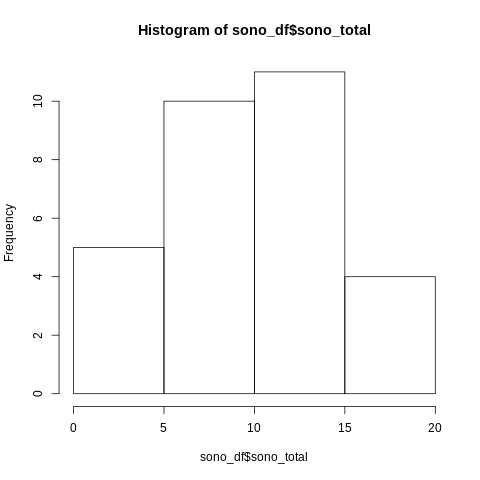

In [68]:
%%R 
hist(sono_df$sono_total)

In [69]:
%%R
# Amostragem de tamanho 10 a partir do dataset original
sample_n(sono_df, size = 10)


# A tibble: 10 x 7
   nome     cidade       pais      sono_total sono_ciclo sono_indice  peso
   <chr>    <chr>        <chr>          <dbl>      <dbl>       <dbl> <dbl>
 1 Carlos   Recife       Brasil          14.4      0.767         9.6    56
 2 Magda    Maceio       Brasil           9.1      0.15         14.9    58
 3 Flavio   Blumenau     Brasil          10       NA            14      69
 4 Leslie   Curitiba     Brasil           2.9      1            21.1    88
 5 Abel     Buenos Aires Argentina       10.3     NA            13.7    66
 6 Abelardo Buenos Aires Argentina        3.1     NA            20.9   102
 7 Tiago    Goiania      Brasil          14.4     NA             9.6    63
 8 Natacha  Blumenau     Brasil           9.4      0.217        14.6    62
 9 Galago   Buenos Aires Argentina        9.8      0.55         14.2    71
10 Sandro   Maceio       Brasil          18        0.333         6      78


---

#**Select()**  - {dplyr}

In [70]:
%%R 
# select()
sleepData <- select(sono_df, nome, sono_total) #selecionando nome, sono_total e atribuir a sleepData
head(sleepData)
class(sleepData)
select(sono_df, nome)
select(sono_df, nome:cidade)
select(sono_df, nome:pais) # retornar um range de colunas, a partir de nome até país. 

# A tibble: 30 x 3
   nome     cidade         pais  
   <chr>    <chr>          <chr> 
 1 Breno    Recife         Brasil
 2 Monica   Fortaleza      Brasil
 3 Tiago    Goiania        Brasil
 4 Fernando Curitiba       Brasil
 5 Matias   Recife         Brasil
 6 Carlos   Recife         Brasil
 7 Josias   Rio de Janeiro Brasil
 8 Marta    Porto Alegre   Brasil
 9 Carolina Porto Alegre   Brasil
10 Keyla    Porto Alegre   Brasil
# … with 20 more rows


---

#**Filter()**  - {dplyr}

In [71]:
%%R
filter(sono_df, sono_total >= 16)

# A tibble: 4 x 7
  nome     cidade    pais   sono_total sono_ciclo sono_indice  peso
  <chr>    <chr>     <chr>       <dbl>      <dbl>       <dbl> <dbl>
1 Monica   Fortaleza Brasil       17       NA             7      72
2 Leonardo Maceio    Brasil       17.4      0.383         6.6    70
3 Sandro   Maceio    Brasil       18        0.333         6      78
4 Raisa    Maceio    Brasil       19.7      0.117         4.3    88


In [72]:
%%R
filter(sono_df, sono_total >= 16, peso >= 80)

# A tibble: 1 x 7
  nome  cidade pais   sono_total sono_ciclo sono_indice  peso
  <chr> <chr>  <chr>       <dbl>      <dbl>       <dbl> <dbl>
1 Raisa Maceio Brasil       19.7      0.117         4.3    88


In [73]:
%%R
filter(sono_df, cidade %in% c("Recife", "Curitiba"))
#pesquisar em cidade apenas valores Recife e Curitiba
#aplicando SQL em R

# A tibble: 6 x 7
  nome     cidade   pais   sono_total sono_ciclo sono_indice  peso
  <chr>    <chr>    <chr>       <dbl>      <dbl>       <dbl> <dbl>
1 Breno    Recife   Brasil       12.1     NA            11.9    50
2 Fernando Curitiba Brasil       14.9      0.133         9.1    67
3 Matias   Recife   Brasil        4        0.667        20      49
4 Carlos   Recife   Brasil       14.4      0.767         9.6    56
5 Leslie   Curitiba Brasil        2.9      1            21.1    88
6 Nadia    Recife   Brasil       10.1      0.283        13.9   120


---

#**Arrange()** - {dplyr}

In [74]:
%%R
#arrange()
sono_df %>% #operador de concatenação de operações
arrange(cidade) %>% head

# A tibble: 6 x 7
  nome    cidade         pais      sono_total sono_ciclo sono_indice  peso
  <chr>   <chr>          <chr>          <dbl>      <dbl>       <dbl> <dbl>
1 Lais    Belo Horizonte Brasil          14.9     NA             9.1    96
2 Larissa Belo Horizonte Brasil          12.5      0.417        11.5    58
3 Natacha Blumenau       Brasil           9.4      0.217        14.6    62
4 Flavio  Blumenau       Brasil          10       NA            14      69
5 Natalia Blumenau       Brasil          12.5      0.117        11.5    67
6 Abel    Buenos Aires   Argentina       10.3     NA            13.7    66


In [75]:
%%R
sono_df %>% 
  select(nome, cidade, sono_total) %>% #select
  arrange(cidade, sono_total) %>% #arrange
  head #head

# A tibble: 6 x 3
  nome     cidade         sono_total
  <chr>    <chr>               <dbl>
1 Larissa  Belo Horizonte       12.5
2 Lais     Belo Horizonte       14.9
3 Natacha  Blumenau              9.4
4 Flavio   Blumenau             10  
5 Natalia  Blumenau             12.5
6 Abelardo Buenos Aires          3.1


In [76]:
%%R
sono_df %>% 
  select(nome, cidade, sono_total) %>% #select
  arrange(cidade, sono_total) %>% #arrange
  filter(sono_total >= 16) #filter

# A tibble: 4 x 3
  nome     cidade    sono_total
  <chr>    <chr>          <dbl>
1 Monica   Fortaleza       17  
2 Leonardo Maceio          17.4
3 Sandro   Maceio          18  
4 Raisa    Maceio          19.7


In [77]:
%%R
sono_df %>% 
  select(nome, cidade, sono_total) %>% #select
  arrange(cidade, desc(sono_total)) %>% #arrange desc
  filter(sono_total >= 16) # filter

# A tibble: 4 x 3
  nome     cidade    sono_total
  <chr>    <chr>          <dbl>
1 Monica   Fortaleza       17  
2 Raisa    Maceio          19.7
3 Sandro   Maceio          18  
4 Leonardo Maceio          17.4


---

#**Mutate()**  - {dplyr}

In [78]:
%%R
sono_df %>% 
  mutate(novo_indice = sono_total / peso) %>% #mutate mostra 1 novo campo em tempo de execução sem alterar dataframe
  head #head

# A tibble: 6 x 8
  nome     cidade    pais   sono_total sono_ciclo sono_indice  peso novo_indice
  <chr>    <chr>     <chr>       <dbl>      <dbl>       <dbl> <dbl>       <dbl>
1 Breno    Recife    Brasil       12.1     NA            11.9    50      0.242 
2 Monica   Fortaleza Brasil       17       NA             7      72      0.236 
3 Tiago    Goiania   Brasil       14.4     NA             9.6    63      0.229 
4 Fernando Curitiba  Brasil       14.9      0.133         9.1    67      0.222 
5 Matias   Recife    Brasil        4        0.667        20      49      0.0816
6 Carlos   Recife    Brasil       14.4      0.767         9.6    56      0.257 


In [79]:
%%R
sono_df %>% 
  mutate(novo_indice = sono_total / peso, peso_libras = peso / 0.45359237) %>% #mutate mostra 2 novos campo em tempo de execução sem alterar dataframe
  head #head

# A tibble: 6 x 9
  nome  cidade pais  sono_total sono_ciclo sono_indice  peso novo_indice
  <chr> <chr>  <chr>      <dbl>      <dbl>       <dbl> <dbl>       <dbl>
1 Breno Recife Bras…       12.1     NA            11.9    50      0.242 
2 Moni… Forta… Bras…       17       NA             7      72      0.236 
3 Tiago Goian… Bras…       14.4     NA             9.6    63      0.229 
4 Fern… Curit… Bras…       14.9      0.133         9.1    67      0.222 
5 Mati… Recife Bras…        4        0.667        20      49      0.0816
6 Carl… Recife Bras…       14.4      0.767         9.6    56      0.257 
# … with 1 more variable: peso_libras <dbl>


---

#**Summarise()** - {dplyr}

In [80]:
%%R
sono_df %>% 
  summarise(media_sono = mean(sono_total)) #summarise + mean


# A tibble: 1 x 1
  media_sono
       <dbl>
1       10.3


In [81]:
%%R
sono_df %>% 
  summarise(media_sono = mean(sono_total), #summarise + mean
            min_sono = min(sono_total), #min
            max_sono = max(sono_total), #max
            total = n()) #n

# A tibble: 1 x 4
  media_sono min_sono max_sono total
       <dbl>    <dbl>    <dbl> <int>
1       10.3      2.9     19.7    30


---

#**Group_By()**  - {dplyr}
## Antes agrupamento e depois sumarização 

In [82]:
%%R
sono_df %>% 
  group_by(cidade) %>%  #group_by - agrupado por cidade
  summarise(avg_sono = mean(sono_total), #summarise
            min_sono = min(sono_total), #min
            max_sono = max(sono_total), #max
            total = n()) #n 

# A tibble: 11 x 5
   cidade         avg_sono min_sono max_sono total
   <chr>             <dbl>    <dbl>    <dbl> <int>
 1 Belo Horizonte    13.7      12.5     14.9     2
 2 Blumenau          10.6       9.4     12.5     3
 3 Buenos Aires       7.77      3.1     10.3     6
 4 Capri              5.3       5.3      5.3     1
 5 Curitiba           8.9       2.9     14.9     2
 6 Fortaleza         17        17       17       1
 7 Goiania           12.6      10.9     14.4     2
 8 Maceio            13.6       3.9     19.7     5
 9 Porto Alegre       6.7       3       10.1     3
10 Recife            10.2       4       14.4     4
11 Rio de Janeiro     8.7       8.7      8.7     1


---

#**Operador: %>%** - {dplyr}

In [83]:
%%R #notação comum
head(select(sono_df, nome, sono_total))

NULL


In [84]:
%%R
sono_df %>% #outra notação para o mesmo comando anterior sem o pipe
  select(nome, sono_total) %>% 
  head

# A tibble: 6 x 2
  nome     sono_total
  <chr>         <dbl>
1 Breno          12.1
2 Monica         17  
3 Tiago          14.4
4 Fernando       14.9
5 Matias          4  
6 Carlos         14.4


In [85]:
%%R
sono_df %>%
  mutate(novo_indice = round(sono_total * peso)) %>%  #mutate + round
  arrange(desc(novo_indice)) %>% #arrange + desd
  select(cidade, novo_indice) #select 

# A tibble: 30 x 2
   cidade         novo_indice
   <chr>                <dbl>
 1 Maceio                1734
 2 Belo Horizonte        1430
 3 Maceio                1404
 4 Fortaleza             1224
 5 Maceio                1218
 6 Recife                1212
 7 Porto Alegre          1020
 8 Curitiba               998
 9 Goiania                981
10 Goiania                907
# … with 20 more rows


In [86]:
%%R
sono_df

# A tibble: 30 x 7
   nome     cidade         pais   sono_total sono_ciclo sono_indice  peso
   <chr>    <chr>          <chr>       <dbl>      <dbl>       <dbl> <dbl>
 1 Breno    Recife         Brasil       12.1     NA            11.9    50
 2 Monica   Fortaleza      Brasil       17       NA             7      72
 3 Tiago    Goiania        Brasil       14.4     NA             9.6    63
 4 Fernando Curitiba       Brasil       14.9      0.133         9.1    67
 5 Matias   Recife         Brasil        4        0.667        20      49
 6 Carlos   Recife         Brasil       14.4      0.767         9.6    56
 7 Josias   Rio de Janeiro Brasil        8.7      0.383        15.3    58
 8 Marta    Porto Alegre   Brasil        7       NA            17      90
 9 Carolina Porto Alegre   Brasil       10.1      0.333        13.9   101
10 Keyla    Porto Alegre   Brasil        3       NA            21      95
# … with 20 more rows


In [0]:
%%R
sono_df2 <- sono_df %>%
  mutate(novo_indice = round(sono_total * peso)) %>%
  arrange(desc(novo_indice)) %>%
  select(cidade, novo_indice)



---



---


#**Estudo de caso** - {dplyr & hflights}
## Limpando, Transformando e Manipulando Dados de Voos

In [0]:
%%R
install.packages("hflights")
library(hflights)
library(dplyr)



---



#**tbl_df()** - {dplyr}
## 1. Criando objeto Tibble DataFrame

In [0]:
%%R
flights <- tbl_df(hflights)

#**glimpse()**
## 2. Resumindo dados, tipos e dimensão 

In [90]:
%%R 
glimpse(flights)

Rows: 227,496
Columns: 21
$ Year              <int> 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 201…
$ Month             <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ DayofMonth        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …
$ DayOfWeek         <int> 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, …
$ DepTime           <int> 1400, 1401, 1352, 1403, 1405, 1359, 1359, 1355, 144…
$ ArrTime           <int> 1500, 1501, 1502, 1513, 1507, 1503, 1509, 1454, 155…
$ UniqueCarrier     <chr> "AA", "AA", "AA", "AA", "AA", "AA", "AA", "AA", "AA…
$ FlightNum         <int> 428, 428, 428, 428, 428, 428, 428, 428, 428, 428, 4…
$ TailNum           <chr> "N576AA", "N557AA", "N541AA", "N403AA", "N492AA", "…
$ ActualElapsedTime <int> 60, 60, 70, 70, 62, 64, 70, 59, 71, 70, 70, 56, 63,…
$ AirTime           <int> 40, 45, 48, 39, 44, 45, 43, 40, 41, 45, 42, 41, 44,…
$ ArrDelay          <int> -10, -9, -8, 3, -3, -7, -1, -16, 44, 43, 29, 5, -9,…
$ DepDelay          <int> 

#**data.frame()**
##3.  Visualizando como DataFrame

In [91]:
%%R
data.frame(head(flights))

  Year Month DayofMonth DayOfWeek DepTime ArrTime UniqueCarrier FlightNum
1 2011     1          1         6    1400    1500            AA       428
2 2011     1          2         7    1401    1501            AA       428
3 2011     1          3         1    1352    1502            AA       428
4 2011     1          4         2    1403    1513            AA       428
5 2011     1          5         3    1405    1507            AA       428
6 2011     1          6         4    1359    1503            AA       428
  TailNum ActualElapsedTime AirTime ArrDelay DepDelay Origin Dest Distance
1  N576AA                60      40      -10        0    IAH  DFW      224
2  N557AA                60      45       -9        1    IAH  DFW      224
3  N541AA                70      48       -8       -8    IAH  DFW      224
4  N403AA                70      39        3        3    IAH  DFW      224
5  N492AA                62      44       -3        5    IAH  DFW      224
6  N262AA                64     

# Slicing

In [92]:
#filtrando dados com slice
%%R
flights[flights$Month == 1 & flights$DayofMonth == 1, ] #expresão inteira para retornar as linhas especificas e todas as colunas 

# A tibble: 552 x 21
    Year Month DayofMonth DayOfWeek DepTime ArrTime UniqueCarrier FlightNum
   <int> <int>      <int>     <int>   <int>   <int> <chr>             <int>
 1  2011     1          1         6    1400    1500 AA                  428
 2  2011     1          1         6     728     840 AA                  460
 3  2011     1          1         6    1631    1736 AA                 1121
 4  2011     1          1         6    1756    2112 AA                 1294
 5  2011     1          1         6    1012    1347 AA                 1700
 6  2011     1          1         6    1211    1325 AA                 1820
 7  2011     1          1         6     557     906 AA                 1994
 8  2011     1          1         6    1824    2106 AS                  731
 9  2011     1          1         6     654    1124 B6                  620
10  2011     1          1         6    1639    2110 B6                  622
# … with 542 more rows, and 13 more variables: TailNum <chr>,
#   A

#**filter()** - {dplyr}
## Prático

In [93]:
#aplicando filter 
%%R
filter(flights, Month == 1, DayofMonth == 1 ) #filter + duas regras de filtro

# A tibble: 552 x 21
    Year Month DayofMonth DayOfWeek DepTime ArrTime UniqueCarrier FlightNum
   <int> <int>      <int>     <int>   <int>   <int> <chr>             <int>
 1  2011     1          1         6    1400    1500 AA                  428
 2  2011     1          1         6     728     840 AA                  460
 3  2011     1          1         6    1631    1736 AA                 1121
 4  2011     1          1         6    1756    2112 AA                 1294
 5  2011     1          1         6    1012    1347 AA                 1700
 6  2011     1          1         6    1211    1325 AA                 1820
 7  2011     1          1         6     557     906 AA                 1994
 8  2011     1          1         6    1824    2106 AS                  731
 9  2011     1          1         6     654    1124 B6                  620
10  2011     1          1         6    1639    2110 B6                  622
# … with 542 more rows, and 13 more variables: TailNum <chr>,
#   A

In [94]:
#aplicando filter
%%R
filter(flights, UniqueCarrier %in% c("AA", "UA"))


# A tibble: 5,316 x 21
    Year Month DayofMonth DayOfWeek DepTime ArrTime UniqueCarrier FlightNum
   <int> <int>      <int>     <int>   <int>   <int> <chr>             <int>
 1  2011     1          1         6    1400    1500 AA                  428
 2  2011     1          2         7    1401    1501 AA                  428
 3  2011     1          3         1    1352    1502 AA                  428
 4  2011     1          4         2    1403    1513 AA                  428
 5  2011     1          5         3    1405    1507 AA                  428
 6  2011     1          6         4    1359    1503 AA                  428
 7  2011     1          7         5    1359    1509 AA                  428
 8  2011     1          8         6    1355    1454 AA                  428
 9  2011     1          9         7    1443    1554 AA                  428
10  2011     1         10         1    1443    1553 AA                  428
# … with 5,306 more rows, and 13 more variables: TailNum <chr>,
#

In [95]:
#aplicando filter
%%R
filter(flights, UniqueCarrier == "AA" | UniqueCarrier == "UA")
# filtrar apenas aquilo que é importante para nosso trabalho. 

# A tibble: 5,316 x 21
    Year Month DayofMonth DayOfWeek DepTime ArrTime UniqueCarrier FlightNum
   <int> <int>      <int>     <int>   <int>   <int> <chr>             <int>
 1  2011     1          1         6    1400    1500 AA                  428
 2  2011     1          2         7    1401    1501 AA                  428
 3  2011     1          3         1    1352    1502 AA                  428
 4  2011     1          4         2    1403    1513 AA                  428
 5  2011     1          5         3    1405    1507 AA                  428
 6  2011     1          6         4    1359    1503 AA                  428
 7  2011     1          7         5    1359    1509 AA                  428
 8  2011     1          8         6    1355    1454 AA                  428
 9  2011     1          9         7    1443    1554 AA                  428
10  2011     1         10         1    1443    1553 AA                  428
# … with 5,306 more rows, and 13 more variables: TailNum <chr>,
#

In [96]:
#aplicando filter &
%%R
filter(flights, UniqueCarrier == "AA" & UniqueCarrier == "UA")
# não há retorno com duas companhias iguais

# A tibble: 0 x 21
# … with 21 variables: Year <int>, Month <int>, DayofMonth <int>,
#   DayOfWeek <int>, DepTime <int>, ArrTime <int>, UniqueCarrier <chr>,
#   FlightNum <int>, TailNum <chr>, ActualElapsedTime <int>, AirTime <int>,
#   ArrDelay <int>, DepDelay <int>, Origin <chr>, Dest <chr>, Distance <int>,
#   TaxiIn <int>, TaxiOut <int>, Cancelled <int>, CancellationCode <chr>,
#   Diverted <int>


In [97]:
#aplicando filter %in% vetor
%%R
filter(flights, UniqueCarrier %in% c("AA", "UA"))

# A tibble: 5,316 x 21
    Year Month DayofMonth DayOfWeek DepTime ArrTime UniqueCarrier FlightNum
   <int> <int>      <int>     <int>   <int>   <int> <chr>             <int>
 1  2011     1          1         6    1400    1500 AA                  428
 2  2011     1          2         7    1401    1501 AA                  428
 3  2011     1          3         1    1352    1502 AA                  428
 4  2011     1          4         2    1403    1513 AA                  428
 5  2011     1          5         3    1405    1507 AA                  428
 6  2011     1          6         4    1359    1503 AA                  428
 7  2011     1          7         5    1359    1509 AA                  428
 8  2011     1          8         6    1355    1454 AA                  428
 9  2011     1          9         7    1443    1554 AA                  428
10  2011     1         10         1    1443    1553 AA                  428
# … with 5,306 more rows, and 13 more variables: TailNum <chr>,
#

#**Select()** - {dplyr}


In [98]:
%%R 
select(flights, Year:DayofMonth, contains("Taxi"), contains("Delay")) 
# seleção da colunas de year até DayofMonth - seleção range de colunas
# e outras colunas que contenham caracteres "Taxi" e "Delay"
# retornou o range + TaxiIn,, TaxiOut, ArrDelay, DepDelay

# A tibble: 227,496 x 7
    Year Month DayofMonth TaxiIn TaxiOut ArrDelay DepDelay
   <int> <int>      <int>  <int>   <int>    <int>    <int>
 1  2011     1          1      7      13      -10        0
 2  2011     1          2      6       9       -9        1
 3  2011     1          3      5      17       -8       -8
 4  2011     1          4      9      22        3        3
 5  2011     1          5      9       9       -3        5
 6  2011     1          6      6      13       -7       -1
 7  2011     1          7     12      15       -1       -1
 8  2011     1          8      7      12      -16       -5
 9  2011     1          9      8      22       44       43
10  2011     1         10      6      19       43       43
# … with 227,486 more rows


#**Organizando os Dados**

In [99]:
%%R
flights %>%
  select(UniqueCarrier, DepDelay) %>%
  arrange(DepDelay) #arrange

# A tibble: 227,496 x 2
   UniqueCarrier DepDelay
   <chr>            <int>
 1 OO                 -33
 2 MQ                 -23
 3 XE                 -19
 4 XE                 -19
 5 CO                 -18
 6 EV                 -18
 7 XE                 -17
 8 CO                 -17
 9 XE                 -17
10 MQ                 -17
# … with 227,486 more rows


In [100]:
%%R
flights%>%
  select(Distance, AirTime) %>%
  mutate(Speed = Distance/AirTime*60) #mutate Speed

# A tibble: 227,496 x 3
   Distance AirTime Speed
      <int>   <int> <dbl>
 1      224      40  336 
 2      224      45  299.
 3      224      48  280 
 4      224      39  345.
 5      224      44  305.
 6      224      45  299.
 7      224      43  313.
 8      224      40  336 
 9      224      41  328.
10      224      45  299.
# … with 227,486 more rows


#**head(with(data(tapply(col1, col2, mean, na.rm = TRUE))**

In [101]:
%%R
head(with(flights, tapply(ArrDelay, Dest, mean, na.rm = TRUE)))

      ABQ       AEX       AGS       AMA       ANC       ASE 
 7.226259  5.839437  4.000000  6.840095 26.080645  6.794643 


#**aggregate()**

In [102]:
%%R 
head(aggregate(ArrDelay ~ Dest, flights, mean))
#agregação por cada um dos tipos de destino

  Dest  ArrDelay
1  ABQ  7.226259
2  AEX  5.839437
3  AGS  4.000000
4  AMA  6.840095
5  ANC 26.080645
6  ASE  6.794643


#**tally()** 

In [103]:
%%R
flights %>%
  group_by(Month, DayofMonth) %>%
  tally(sort = TRUE)

# A tibble: 365 x 3
# Groups:   Month [12]
   Month DayofMonth     n
   <int>      <int> <int>
 1     8          4   706
 2     8         11   706
 3     8         12   706
 4     8          5   705
 5     8          3   704
 6     8         10   704
 7     1          3   702
 8     7          7   702
 9     7         14   702
10     7         28   701
# … with 355 more rows
